# sos

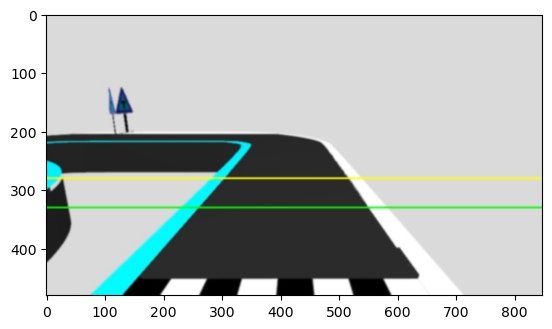

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

cv_image_original = cv2.imread('../damn.jpg')

top_x = 160
top_y = -20

bottom_x = 280
bottom_y = 220

h, w, c = cv_image_original.shape

s1 = h - 150
s2 = h - 200

cv2.line(cv_image_original, (0, s1), (w, s1), (0, 255, 0), 2)
cv2.line(cv_image_original, (0, s2), (w, s2), (255, 255, 0), 2)

cv_image_original = cv2.GaussianBlur(cv_image_original, (5, 5), 0)

pts_src = np.array([[424 - top_x, 240 - top_y], [424 + top_x, 240 - top_y], [424 + bottom_x, 240 + bottom_y], [424 - bottom_x, 240 + bottom_y]])

pts_dst = np.array([[148, 0], [600, 0], [600, 480], [148, 480]])

h, status = cv2.findHomography(pts_src, pts_dst)

cv_image_homography = cv2.warpPerspective(cv_image_original, h, (748, 480))

plt.imshow(np.asarray(cv_image_original))
plt.show()

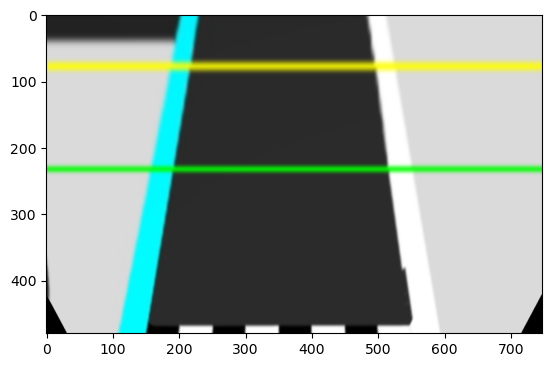

In [34]:
cv_image_dots_ = cv_image_homography.copy()

plt.imshow(np.asarray(cv_image_dots_))
plt.show()

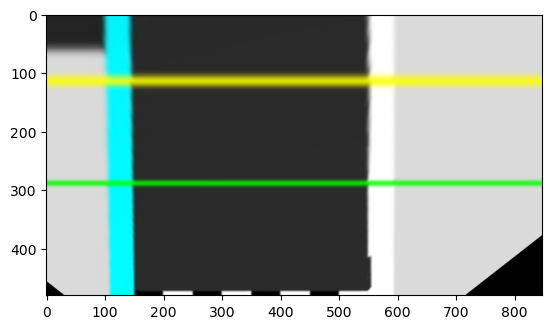

In [28]:
cv_image_dots_ = cv_image_homography.copy()

plt.imshow(np.asarray(cv_image_dots_))
plt.show()

In [4]:
img = cv_image_homography.copy()

h, w, _ = cv_image_homography.shape

heights = [h - 210, h - 110, h - 10]

dot_mas = []

for height in heights:
    row = img[height, :]

    threshold_yellow = [0, 220, 230]    # INVERT!!! BGR
    threshold_white = [230, 230, 230]

    thresholds = [threshold_yellow, threshold_white]

    for threshold in thresholds:
        start = None
        end = None
        for i in range(len(row)):
            if (row[i] > threshold).all() and start is None:
                start = i
            elif (row[i] < threshold).any() and start is not None:
                end = i
                break

        if start is not None and end is not None:
            center_x = (start + end) // 2
            dot_mas.append([center_x, height])
            print(f"Центр вертикальной полосы на высоте {height}: {center_x}")
        else:
            dot_mas.append([None, height])
            print("Полоса не найдена")

Полоса не найдена
Полоса не найдена
Полоса не найдена
Полоса не найдена
Центр вертикальной полосы на высоте 470: 80
Центр вертикальной полосы на высоте 470: 611


In [5]:
height = h - 10

row = img[height, :]

threshold = [50, 50, 50]

center_line = []

starter = 0
ender = w

# for i in range(len(row)):
#     if (row[i] < threshold).all() and starter is None:
#         starter = i
#         print(i)
#     elif (row[i] > threshold).any() and starter is not None:
#         ender = i
#         print(i)
#         break

if starter is not None and ender is not None:
    center_x = (starter + ender) // 2
    center_line.append([center_x, 0])
    center_line.append([center_x, h])

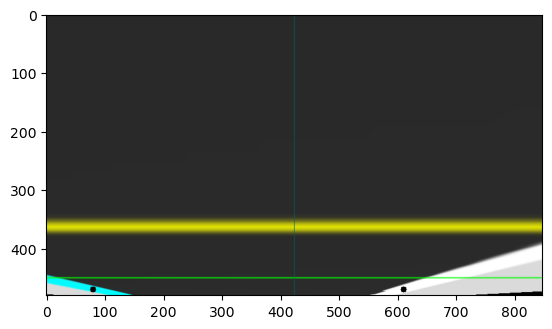

In [6]:
cv_image_dots = cv_image_homography.copy()
for point in dot_mas:
    x, y = point
    if x != None:
        cv2.circle(cv_image_dots, (x, y), radius=5, color=(0, 0, 0), thickness=-1)

cv2.line(cv_image_dots, center_line[0], center_line[1], (0, 100, 100), 1)

plt.imshow(np.asarray(cv_image_dots))
plt.show()

In [7]:
def find_center_of_mass_trapezoid(dot_mas):
    x1, y1 = dot_mas[0]
    x2, y2 = dot_mas[1]
    x3, y3 = dot_mas[3]
    x4, y4 = dot_mas[2]

    # Длины оснований
    L = abs(x2 - x1)
    l = abs(x4 - x3)
    
    # Высота трапеции
    h = abs(y2 - y3)
    
    # Координата x центра массы
    xc = ((L + 2 * l) * x1 + (2 * L + l) * x3) / (3 * (L + l))
    
    # Координата y центра массы
    # yc = h * (y1 + y3) / 2
    yc = np.abs(y1 - y3)/2 + min(y1, y3)
        
    return int(xc), int(yc)

xc1, yc1 = find_center_of_mass_trapezoid(dot_mas[0:4])
xc2, yc2 = find_center_of_mass_trapezoid(dot_mas[2:6])

d_BC = np.sqrt((xc1 - xc2)**2 + (yc2 - yc2)**2)
d_AC = np.sqrt((xc1 - xc1)**2 + (yc2 - yc1)**2)

near = d_AC
oppos = d_BC

angle = np.arctan(oppos/near)
angle_degrees = np.degrees(angle)

print(f"Острый угол равен: {angle_degrees} градусов.")
print(f"Острый угол равен: {angle} radians.")

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

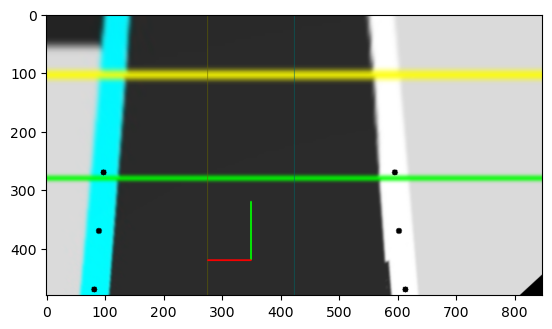

420

In [ ]:
cv_image_dots_lines = cv_image_dots.copy()

# cv2.line(cv_image_dots_lines, (xc1, yc1), (xc2, yc2), (0, 255, 0), 1)
# cv2.line(cv_image_dots_lines, (xc1, yc1), (xc1, yc2), (0, 0, 0), 1)
# cv2.line(cv_image_dots_lines, (xc1, yc2), (xc2, yc2), (255, 255, 255), 1)

cv2.line(cv_image_dots_lines, center_line[0], center_line[1], (0, 100, 100), 1)
cv2.line(cv_image_dots_lines, (2 * xc2 - center_line[0][0], center_line[0][1]), (2 * xc2 - center_line[1][0], center_line[1][1]), (100, 100, 0), 1)

cv2.line(cv_image_dots_lines, (xc2, 420), (xc2, 320), (0, 255, 0), 2)
# cv2.line(cv_image_dots_lines, (xc2, 420), (2 * xc2 - center_line[0][0], 320), (255, 255, 255), 2)
cv2.line(cv_image_dots_lines, (xc2, 420), (2 * xc2 - center_line[0][0], 420), (255, 0, 0), 2)

near = np.sqrt((xc2 - xc2)**2 + (420 - 320)**2)
oppos = np.sqrt((xc2 - 2 * xc2 - center_line[0][0])**2 + (420 - 420)**2)

plt.imshow(np.asarray(cv_image_dots_lines))
plt.show()
yc2

# soser

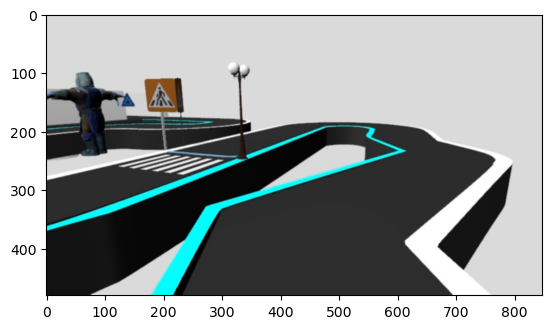

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

cv_image_original = cv2.imread('../last.jpg')
# cv_image_original = cv2.imread('../damn_new.jpg')

# top_x = 62
# top_y = 4

# bottom_x = 150
# bottom_y = 120

# top_x = 100
# top_y = -20

# bottom_x = 220
# bottom_y = 200

top_x = 160
top_y = -20

bottom_x = 280
bottom_y = 220

h, w, c = cv_image_original.shape

s1 = h - 150
s2 = h - 200

# cv2.line(cv_image_original, (0, s1), (w, s1), (0, 255, 0), 2)
# cv2.line(cv_image_original, (0, s2), (w, s2), (255, 255, 0), 2)

cv_image_original = cv2.GaussianBlur(cv_image_original, (3, 3), 0)

pts_src = np.array([[w//2 - top_x, h//2 - top_y], [w//2 + top_x, h//2 - top_y], [w//2 + bottom_x, h//2 + bottom_y], [w//2 - bottom_x, h//2 + bottom_y]])

pts_dst = np.array([[148, 0], [500, 0], [500, 480], [148, 480]])

h, status = cv2.findHomography(pts_src, pts_dst)

cv_image_homography = cv2.warpPerspective(cv_image_original, h, (748, 480))

plt.imshow(np.asarray(cv_image_original))
plt.show()

In [99]:
img = cv_image_homography.copy()

h, w, _ = cv_image_homography.shape

heights = [h - 10, h - 110, h - 210]

widths = [20, 600]

dot_mas = []

# for height in heights:
for z in range(len(heights)):
    row = img[heights[z], :]

    threshold_yellow = [0, 220, 230]    # INVERT!!! BGR
    threshold_white = [230, 230, 230]

    thresholds = [threshold_yellow, threshold_white]

    for threshold in thresholds:
        start = None
        end = None
        for i in range(len(row)):
            if (row[i] > threshold).all() and start is None:
                if threshold == threshold_yellow:
                    if row[i][0] < 20:
                        start = i
                else:
                    start = i
            elif (row[i] < threshold).any() and start is not None:
                end = i
                break
        if start is not None and end is None:
            end = len(row) - 1

        if start is not None and end is not None:
            center_x = (start + end) // 2
            dot_mas.append([center_x, heights[z]])
            # print(f"Центр вертикальной полосы на высоте {heights[z]}: {center_x}")
        else:
            fl = 0
            for width in widths:
                start = None
                end = None
                column = img[:, width]
                for i in range(len(column)):
                    if (column[i] > threshold).all() and start is None:
                        if threshold == threshold_yellow:
                            if row[i][0] < 20:
                                start = i
                                # print('start: ', start)

                        else:
                            start = i
                            # print('start: ', start)
                    elif (column[i] < threshold).any() and start is not None:
                        end = i
                        # print('end: ', end)
                        break

                if start is not None and end is not None:
                    center_y = (start + end) // 2
                    dot_mas.append([width, center_y])
                    fl = 1
                    break
                    
            if fl == 0:
                if z > 0:
                    print(dot_mas[2*z - 2])
                    dot_mas.append([dot_mas[2*z - 2][0], dot_mas[2*z - 2][1]])
                else:
                    dot_mas.append([0, h])
            flag = 1
            # print("Полоса не найдена")
            # dot_mas.append([None, height])
            # print("Полоса не найдена")

dot_mas

[[190, 470], [502, 470], [195, 370], [485, 370], [29, 270], [545, 270]]

In [100]:
img = cv_image_homography.copy()

h, w, _ = cv_image_homography.shape

# heights = [h - 10, h - 110, h - 210]
heights = [h - 10, h - 120, h - 230]

widths = [20, 700]

dot_mas = []

flag = 0

if len(center_line) == 0:
    center_line.append([w // 7 * 2 + 100, 0])
    center_line.append([w // 7 * 2 + 100, h])

for z in range(len(heights)):
    row = img[heights[z], :]

    threshold_yellow = [0, 220, 230]    # INVERT!!! BGR
    threshold_white = [230, 230, 230]

    thresholds = [threshold_yellow, threshold_white]

    for threshold in thresholds:
        start = None
        end = None
        if threshold == threshold_yellow:
            # a = 0
            # b = len(row) // 3 * 2
            # step = 1
            a = len(row) // 3 * 2
            b = -1
            step = -1
        else:
            # a = len(row) - 1
            # b = -1 + len(row) // 3
            # step = -1
            a = len(row) // 3
            b = len(row)
            step = 1

        for i in range(a, b, step):
            if (row[i] > threshold).all() and start is None:
                if threshold == threshold_yellow:
                    if row[i][0] < 20:
                        start = i
                else:
                    start = i
            elif (row[i] < threshold).any() and start is not None:
                end = i
                break
        if start is not None and end is None:
            end = b - step

        if start is not None and end is not None:
            center_x = (start + end) // 2
            dot_mas.append([center_x, heights[z]])
            # print(f"Центр вертикальной полосы на высоте {heights[z]}: {center_x}")
        else:
            # fl = 0
            # for width in widths:
            #     start = None
            #     end = None
            #     column = img[:, width]
            #     for i in range(len(column)):
            #         if (column[i] > threshold).all() and start is None:
            #             if threshold == threshold_yellow:
            #                 if row[i][0] < 20:
            #                     start = i
            #                     # print('start: ', start)

            #             else:
            #                 start = i
            #                 # print('start: ', start)
            #         elif (column[i] < threshold).any() and start is not None:
            #             end = i
            #             # print('end: ', end)
            #             break

            #     if start is not None and end is not None:
            #         center_y = (start + end) // 2
            #         dot_mas.append([width, center_y])
            #         fl = 1
            #         break

            fl = 0
                    
            if threshold == threshold_yellow:
                width = widths[0]
            else:
                width = widths[1]

            start = None
            end = None
            column = img[:, width]
            for i in range(len(column)):
                if (column[i] > threshold).all() and start is None:
                    if threshold == threshold_yellow:
                        if column[i][0] < 20:
                            start = i

                    else:
                        start = i
                        # print('start: ', start)
                elif (column[i] < threshold).any() and start is not None:
                    end = i
                    print('end: ', end)
                    break

            if start is not None and end is not None:
                center_y = (start + end) // 2
                dot_mas.append([width, center_y])
                fl = 1
                            
            if fl == 0:
                # print(z)
                if z > 0:
                    if threshold == threshold_yellow:
                        dot_mas.append([dot_mas[2*z - 2][0], dot_mas[2*z - 2][1]])
                    else:
                        dot_mas.append([dot_mas[2*z - 1][0], dot_mas[2*z - 1][1]])
                else:
                    if threshold == threshold_yellow:
                        dot_mas.append([0, h])
                    else:
                        dot_mas.append([w, h])

dot_mas

[[188, 470], [502, 470], [194, 360], [489, 360], [201, 250], [557, 250]]

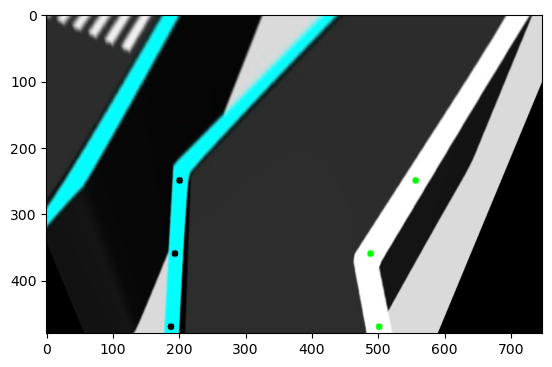

In [101]:
cv_image_dots = cv_image_homography.copy()
for point in dot_mas[::2]:
    x, y = point
    if x != None:
        cv2.circle(cv_image_dots, (x, y), radius=5, color=(0, 0, 0), thickness=-1)

for point in dot_mas[1::2]:
    x, y = point
    if x != None:
        cv2.circle(cv_image_dots, (x, y), radius=5, color=(0, 255, 0), thickness=-1)

plt.imshow(np.asarray(cv_image_dots))
plt.show()

In [102]:
def find_center_of_mass_trapezoid(dot_mas):
    mas = np.unique(dot_mas, axis = 1)

    xc, yc = np.sum(mas, axis=0) / len(mas)
    
    return int(xc), int(yc)

xc1, yc1 = find_center_of_mass_trapezoid(dot_mas[0:4])
xc2, yc2 = find_center_of_mass_trapezoid(dot_mas[2:6])

oppos   = np.sqrt((xc1 - xc2)**2 + (yc1 - yc1)**2)
near    = np.sqrt((xc2 - xc2)**2 + (yc1 - yc2)**2)

angle = np.arctan(oppos/near)
angle_degrees = np.degrees(angle)

print(f"Острый угол равен: {angle_degrees} градусов.")
print(f"Острый угол равен: {angle} radians.")

Острый угол равен: 8.785298717884604 градусов.
Острый угол равен: 0.15333238839832278 radians.


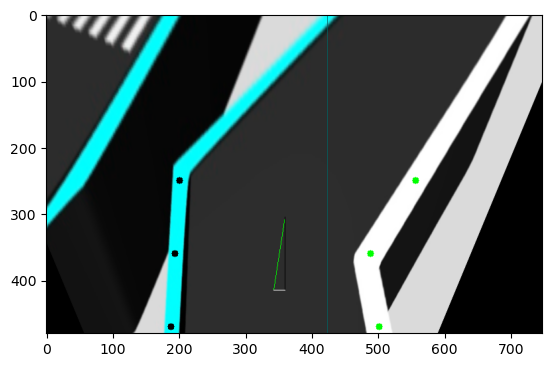

-17


In [103]:
cv_image_dots_lines = cv_image_dots.copy()

cv2.line(cv_image_dots_lines, (xc1, yc1), (xc2, yc2), (0, 255, 0), 1)
cv2.line(cv_image_dots_lines, (xc2, yc1), (xc2, yc2), (0, 0, 0), 1)
cv2.line(cv_image_dots_lines, (xc1, yc1), (xc2, yc1), (255, 255, 255), 1)

cv2.line(cv_image_dots_lines, center_line[0], center_line[1], (0, 100, 100), 1)

plt.imshow(np.asarray(cv_image_dots_lines))
plt.show()

print(xc1 - xc2)

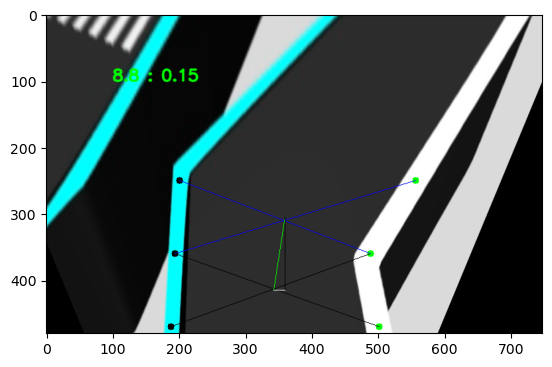

In [104]:
cv_image_dots_diags = cv_image_dots.copy()

cv2.line(cv_image_dots_diags, dot_mas[0], dot_mas[3], (0, 0, 0), 1)
cv2.line(cv_image_dots_diags, dot_mas[1], dot_mas[2], (0, 0, 0), 1)

cv2.line(cv_image_dots_diags, dot_mas[2], dot_mas[5], (0, 0, 255), 1)
cv2.line(cv_image_dots_diags, dot_mas[3], dot_mas[4], (0, 0, 255), 1)

cv2.line(cv_image_dots_diags, (xc1, yc1), (xc2, yc2), (0, 255, 0), 1)
cv2.line(cv_image_dots_diags, (xc2, yc1), (xc2, yc2), (0, 0, 0), 1)
cv2.line(cv_image_dots_diags, (xc1, yc1), (xc2, yc1), (255, 255, 255), 1)

cv2.putText(cv_image_dots_diags, f"{angle_degrees:.2} : {angle:.2}", (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(np.asarray(cv_image_dots_diags))
plt.show()

In [3]:
import numpy as np

dot_mas = [[500, 119], [700, 100], [500, 119], [700, 100]]

np.unique(dot_mas, axis = 0)

array([[500, 119],
       [700, 100]])